# Working with NIfTI files

This is followed from a tutorial already completed using a different NIfTI file.  https://neuraldatascience.io/8-mri/nifti.html

This is to interact with the type of file that will be used for analysis of the ADHD 200 preprocessed dataset.

The file used in this tutorial is the mean of the preprocessed fMRI for patient 0026001 from Brown University in the ADHD 200 test data

## Import image

Import the NIfTI file using the `nibable` library. As previously discussed, this image is the average of the fMRI 4-D file for patient 0026001

The type of this file is a class unique to `nibable`

In [1]:
import nibabel as nib

brain_vol = nib.load('Brown/0026001/wmean_mrda0026001_session_1_rest_1.nii.gz')

type(brain_vol)

nibabel.nifti1.Nifti1Image

## Image data

To access the image data for this file, the `get_fdata()` function is used. This gets a numpy array consisting of float values representing the intensity of stimulus in the brain

In [2]:
brain_vol_data = brain_vol.get_fdata()
type(brain_vol_data)

numpy.ndarray

The shape of the numpy array is as shown below. There are only three dimensions, since this image is the average of all time values

In [3]:
brain_vol_data.shape

(49, 58, 47)

## Visualize

Slices of the fMRI can be taken and plotted. This is an image of the file at a point roughly in the middle of the brain

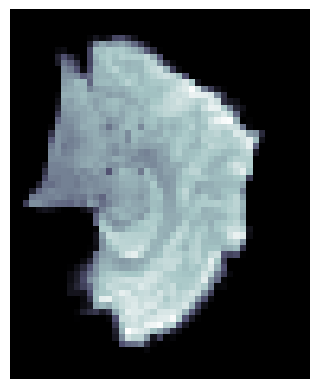

In [5]:
import matplotlib.pyplot as plt

plt.imshow(brain_vol_data[27], cmap='bone')
plt.axis('off')
plt.show()

The image can be rotated using the `.rotate()` method in the `scipy.ndimage` library

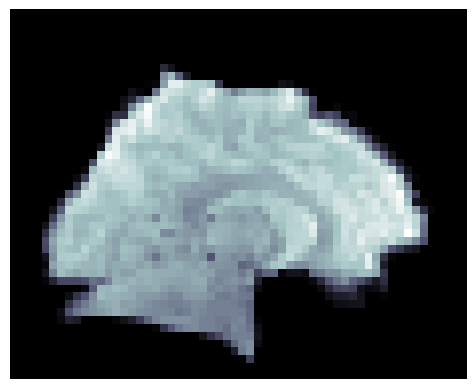

In [6]:
import scipy.ndimage as ndi

plt.imshow(ndi.rotate(brain_vol_data[27], 90), cmap='bone')
plt.axis('off')
plt.show()

Slices can be taken in sequence to better visualize different areas of the brain

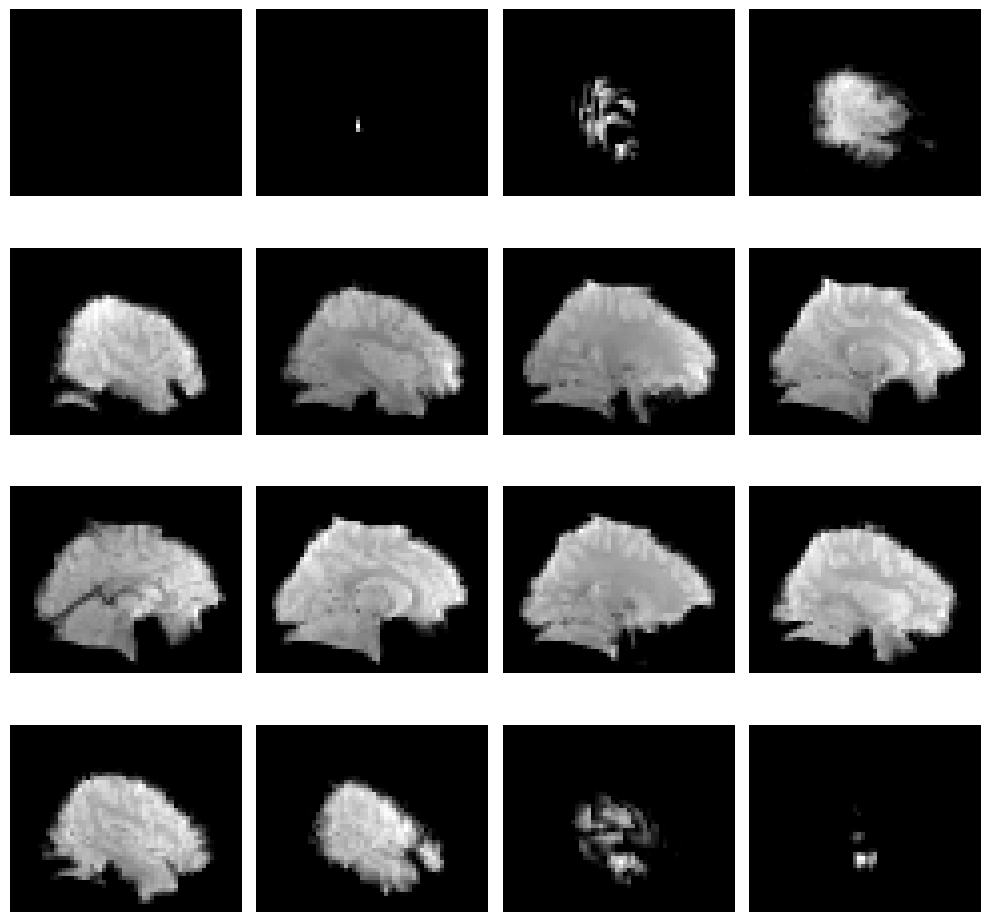

In [7]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10,10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

## Visualize another way

There is a better way to visualize the fMRI file with a library specifically designed for neuroimaging.

Use `plot_img()` to plot the fMRI using `nilearn` (the better neuroimaging graphing library

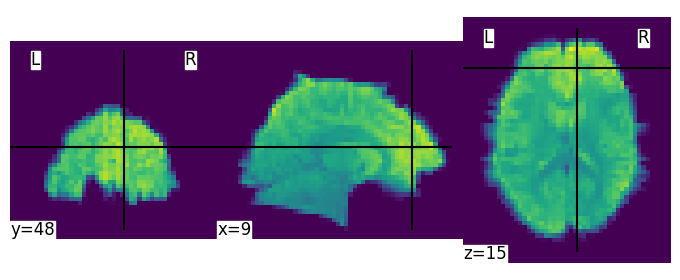

In [8]:
from nilearn import plotting

plotting.plot_img(brain_vol)
plt.show()

This is using `matplotlib`

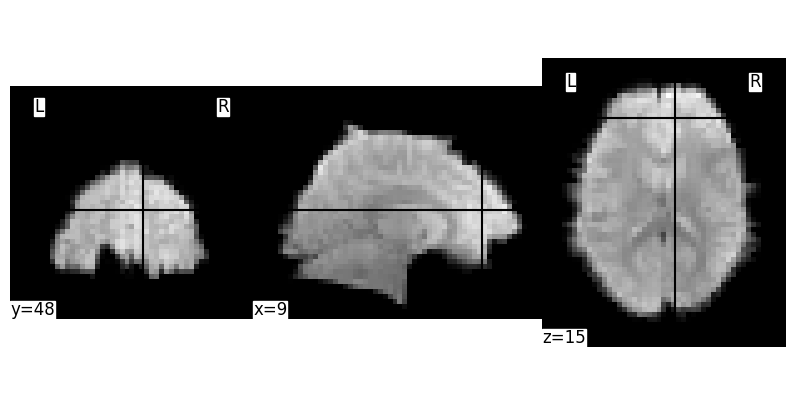

In [9]:
fig, ax = plt.subplots(figsize=[10,5])
plotting.plot_img(brain_vol, cmap='gray', axes=ax)
plt.show()

This is using `nilearn`

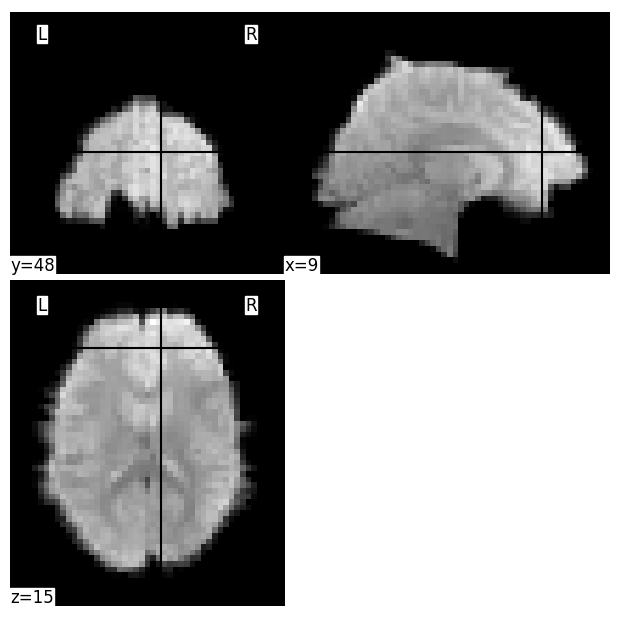

In [10]:
plotting.plot_img(brain_vol, display_mode='tiled', cmap='gray')
plt.show()

Can also specifiy the coordinates to view the slices at

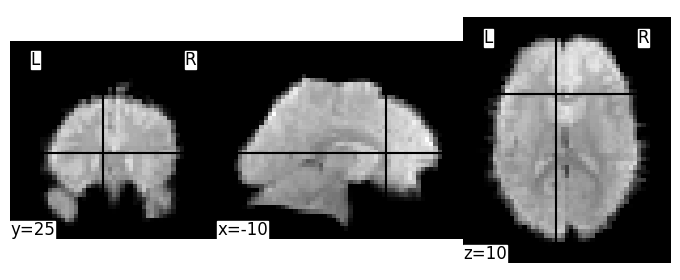

In [14]:
plotting.plot_img(brain_vol, cmap='gray', cut_coords=(-10,25,10))